In [1]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import fmin_ncg

# os.chdir("/Users/jiajiechen/Desktop/CSE6240-HW2")
os.getcwd()

'/Users/jiajiechen/Desktop/CSE6240-HW2/hw2'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
%matplotlib inline

pylab.rcParams['figure.figsize'] = 10, 8  # that's default image size for this interactive session

/Users/jiajiechen/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
path = "/Users/jiajiechen/Desktop/CSE6240-HW2/hw2"
datapath = "/Users/jiajiechen/Desktop/CSE6240-HW2/hw2"

## Helper functions

In [4]:
def mapFeature(X, degree=6, include_bias=False):
    """Suppose X is [X_1, X_2]"""
    output = np.empty(X.shape[0])
    for ii in range(1,degree+1):
        for jj in xrange(ii+1):
            output = np.column_stack((output, X[:,0]**(ii-jj)*X[:,1]**jj))
        #end
    #end
    if include_bias: return output
    else: return np.delete(output, obj=0, axis=1)

## Part 1 ex2

In [5]:
class logisticRegression(object):
    """Logistic Regression
       @Author: Jiajie Chen
       @Date: Apr 25, 2016
    """
    def __init__(self,
                 theta=None,
                 lambd=0.0, 
                 cost=0.0,
                 max_iter=100,
                 tol=1e-5,
                 solver='newton-cg',
                 verbose = False):
        self.theta = theta
        self.lambd = lambd
        self.cost = cost
        self.max_iter = max_iter
        self.tol = tol
        self.solver=solver
        self.verbose=verbose
        
    def fit(self, X, y):
        X_c = np.column_stack((np.ones(X.shape[0]),X)) 
        self.theta = np.zeros(X.shape[1]+1)
        if self.solver == 'newton-cg':
            from scipy.optimize import fmin_ncg
            self.theta = fmin_ncg(self.costFunction, self.theta, 
                                  fprime=self.gradient, args=(X_c, y),
                                  maxiter=self.max_iter, avextol=self.tol, 
                                  disp=self.verbose)
        else:
            pass
        self.cost = self.costFunction(self.theta, X_c, y)
    
    def get_prob(self, X):
        X_c = np.column_stack((np.ones(X.shape[0]),X))
        return self.sigmoid(X_c.dot(self.theta))

    def predict(self, X):
        X_c = np.column_stack((np.ones(X.shape[0]),X))
        return (self.get_prob(X)>0.5).astype(int)
    
    def accuracy(self, y_pred, y_true):
        if isinstance(y_pred, list): y_pred=np.array(y_pred)
        if isinstance(y_true, list): y_pred=np.array(y_true)
        return np.mean(y_pred == y_true)

    def sigmoid(self, z):
        """z can be a matrix, vector or scalar"""
        if isinstance(z, list): z=np.array(z)
        return 1/(1+np.exp(-z))
    
    def costFunction(self, theta, X_c, y):
        n_row = X_c.shape[0]
        J = (1.0/n_row)*(-np.log(self.sigmoid(X_c.dot(theta))).dot(y)
                         -np.log(1-self.sigmoid(X_c.dot(theta))).dot(1-y))\
             + ((1.0*self.lambd)/(2*n_row))*np.sum(theta[1:]**2)
        return J

    def gradient(self, theta, X_c, y):
        n_row, n_col = X_c.shape
        grad = np.empty(theta.shape)
        grad[0] = (1.0/n_row)*X_c[:,0].T.dot(self.sigmoid(X_c.dot(theta))-y)
        grad[1:] = (1.0/n_row)*X_c[:,1:].T.dot(self.sigmoid(X_c.dot(theta))-y)+(float(self.lambd)/n_row)*theta[1:]
        return grad

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 29
         Function evaluations: 72
         Gradient evaluations: 252
         Hessian evaluations: 0


array([-25.16138325,   0.20623211,   0.201472  ])

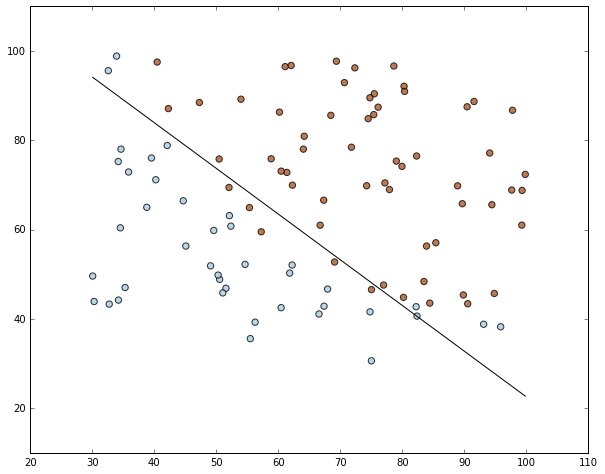

In [6]:
data = pd.read_csv(datapath+"/ex2data1.txt", delimiter=",", header=None)
X = data.values[:,:2]
y = data.values[:,2]
del(data)

pylab.scatter(X[:,0],X[:,1],c=y,s=40,alpha=0.8,cmap=pylab.cm.Paired)

clf = logisticRegression(lambd=0,tol=1e-6,verbose=True)
clf.fit(X,y)
y_pred = clf.predict(X)
clf.accuracy(y_pred, y)

# add decision boundary
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = -clf.theta[1]/clf.theta[2]*xx - clf.theta[0]/clf.theta[2]
pylab.plot(xx, yy, 'k-')

clf.theta

## Part 1 ex2_reg

(118, 27)

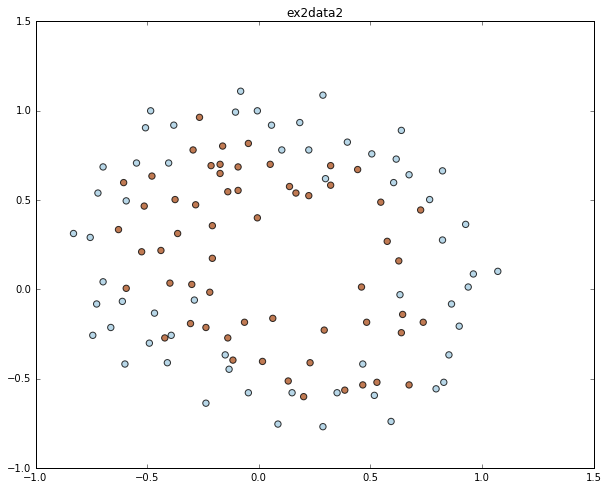

In [7]:
data = pd.read_csv(datapath+"/ex2data2.txt", delimiter=",", header=None)
X = data.values[:,:2]
y = data.values[:,2]
del(data)
plt.scatter(X[:,0],X[:,1],c=y,s=40,alpha=0.8,cmap=plt.cm.Paired)
plt.title("ex2data2")

X_new = mapFeature(X)

X_new.shape

In [8]:
clf = logisticRegression(lambd=1, verbose=True, tol=1e-10)
clf.fit(X_new,y)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 82
         Hessian evaluations: 0


In [9]:
y_pred = clf.predict(X_new)
clf.accuracy(y_pred, y)

0.83050847457627119

In [10]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

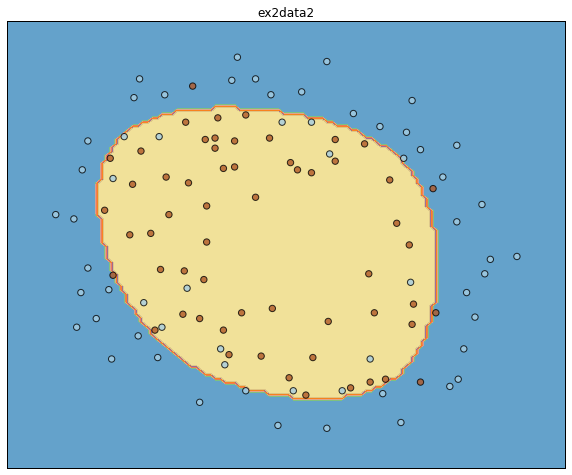

In [11]:
Z = clf.predict(mapFeature(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,alpha=0.8,cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("ex2data2")

## Part 2

In [12]:
class logisticRegression_sgd(logisticRegression): 
    """inherited logisticRegression class
       @Author: Jiajie Chen
       @Date: Apr 27, 2016
    """
    def __init__(self,
                 lambd=0.0,
                 mini_batch_size=20, 
                 tol=1e-5,
                 theta=None,
                 J_container=None,
                 viz=False,
                 learning_rate=0.1,
                 max_iters=4000,
                 verbose=False,
                 full_batch=False,
                 rndbatch=False,
                 THETAS=None):
        self.lambd=lambd
        self.tol=tol
        self.theta=theta
        self.J_container=J_container
        self.mini_batch_size=mini_batch_size
        self.viz=viz
        self.learning_rate=learning_rate
        self.max_iters=max_iters
        self.verbose=verbose
        self.full_batch=full_batch
        self.rndbatch=rndbatch
        #self.THETAS=THETAS
    
    def fit(self, X, y):
        X_c = np.column_stack((np.ones(X.shape[0]),X)) 
        self.theta = np.zeros(X.shape[1]+1)
        self.theta,_ = self.mini_batch_sgd(X_c,y,
                                           self.theta,
                                           self.learning_rate,
                                           self.max_iters,
                                           self.tol)

    def mini_batch_sgd(self,X,y,theta,learning_rate,max_iters,tol):
        J_old = 0
        J_container = []
        
        if self.full_batch:
            batch = X
            batch_y = y

        remain = X.shape[0]
        idx_old = 0
        idx = self.mini_batch_size
        
        for ii in xrange(max_iters):
            if self.full_batch:
                pass
            else:
                if self.rndbatch:
                    sampleidx = np.random.choice(X.shape[0],self.mini_batch_size)
                    batch = X[sampleidx,:]
                    batch_y = y[sampleidx]
                else:
                    sampleidx = np.array(range(idx_old,idx))
                    batch = X[sampleidx,:]
                    batch_y = y[sampleidx]
                    remain = remain - self.mini_batch_size
                    idx_old = idx
                    if idx+self.mini_batch_size<X.shape[0]:
                        idx=idx+self.mini_batch_size
                    else:
                        idx=X.shape[0]
                    if remain < 0:
                        remain = X.shape[0]
                        idx_old = 0
                        idx = self.mini_batch_size

            gd = self.gradient(theta, batch, batch_y)
            theta = theta - learning_rate*gd
            J = self.costFunction(theta, X, y)
            if self.verbose: print J

            if np.abs(J-J_old) < tol:
                print "converaged at", tol
                self.COSTS = pd.Series(J_container)
                if self.viz: self.COSTS.plot()
                return theta, J
            else: J_old = J
            J_container.append(J) #for visualization cost versus iter
        
        self.J_container = pd.Series(J_container)
        if self.viz: self.J_container.plot()
        print "failed to converage at!", tol
        return theta, J

In [13]:
data = pd.read_csv(datapath+"/ex2data1.txt", delimiter=",", header=None)
X = data.values[:,:2]
y = data.values[:,2]
del(data)
X_c = np.column_stack((np.ones(X.shape[0]),X))
theta = np.zeros(X_c.shape[1])

## gradient check
print "Gradient="
theta = np.array([0.02,-0.004,-0.008])
test = logisticRegression_sgd()
print test.gradient(theta, X_c, y)

print "Cost Function Approximation:"
for ii in xrange(X_c.shape[1]):
    epsilon = 0.00001*np.eye(X_c.shape[1])[ii]
    print (test.costFunction(theta+epsilon, X_c, y)-test.costFunction(theta, X_c, y))/np.linalg.norm(epsilon)

Gradient=
[ -0.28294928 -24.32832895 -23.95945631]
Cost Function Approximation:
-0.28294820642
-24.323357972
-23.9545109604


In [14]:
data = pd.read_csv(datapath+"/ex2data2.txt", delimiter=",", header=None)
X = data.values[:,:2]
y = data.values[:,2]
del(data)

X_new = mapFeature(X)
X_new.shape

(118, 27)

failed to converage at! 1e-07


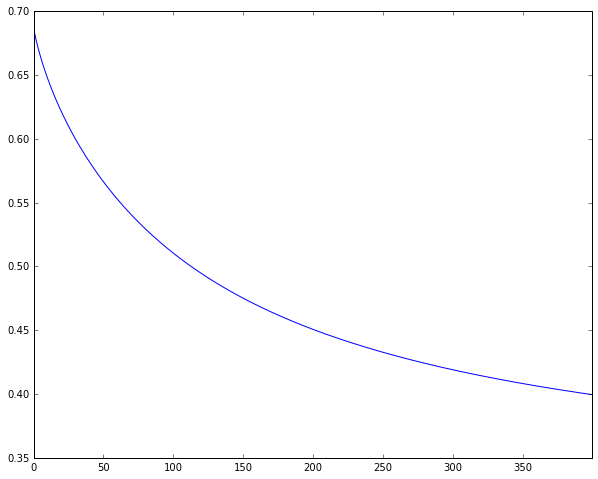

In [15]:
pylab.rcParams['figure.figsize']=10,8 # that's default image size for this interactive session

test = logisticRegression_sgd(viz = True,
                             learning_rate=0.5,
                             max_iters = 400,
                             tol=1e-7,
                             full_batch=True)
test.fit(X_new,y)

In [16]:
# random batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.5,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = True)
test.fit(X_new,y)
lr1=test.J_container

# random batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.3,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = True)
test.fit(X_new,y)
lr2=test.J_container

# random batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.1,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = True)
test.fit(X_new,y)
lr3=test.J_container


# random batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.05,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = True)
test.fit(X_new,y)
lr4=test.J_container

# random batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.03,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = True)
test.fit(X_new,y)
lr5=test.J_container

# random batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.01,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = True)
test.fit(X_new,y)
lr6=test.J_container

failed to converage at! 1e-10
failed to converage at! 1e-10
failed to converage at! 1e-10
failed to converage at! 1e-10
failed to converage at! 1e-10
failed to converage at! 1e-10


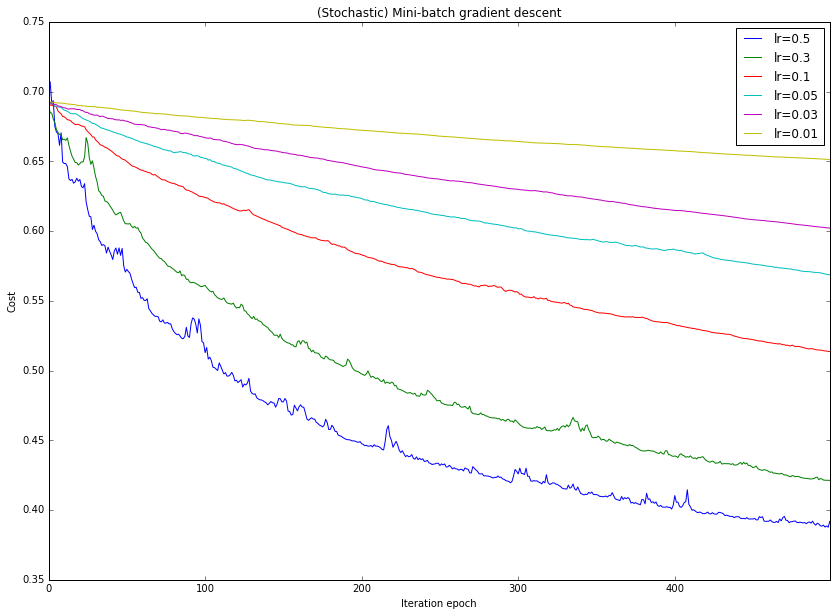

In [17]:
pylab.rcParams['figure.figsize']=14,10 # that's default image size for this interactive session

lr1.plot(label = "lr=0.5")
lr2.plot(label = "lr=0.3")
lr3.plot(label = "lr=0.1")
lr4.plot(label = "lr=0.05")
lr5.plot(label = "lr=0.03")
lr6.plot(label = "lr=0.01")

plt.legend()
plt.xlabel("Iteration epoch")
plt.ylabel("Cost")
plt.title("(Stochastic) Mini-batch gradient descent")

In [18]:
# Sequential batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.5,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = False)
test.fit(X_new,y)
lr1=test.J_container

# Sequential batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.3,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = False)
test.fit(X_new,y)
lr2=test.J_container

# Sequential batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.1,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = False)
test.fit(X_new,y)
lr3=test.J_container


# Sequential batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.05,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = False)
test.fit(X_new,y)
lr4=test.J_container

# Sequential batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.03,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = False)
test.fit(X_new,y)
lr5=test.J_container

# Sequential batch
test = logisticRegression_sgd(viz = False,
                              learning_rate=0.01,
                              max_iters = 500,
                              tol=1e-10,
                              full_batch=False,
                              mini_batch_size=10,
                              rndbatch = False)
test.fit(X_new,y)
lr6=test.J_container

failed to converage at! 1e-10
failed to converage at! 1e-10
failed to converage at! 1e-10
failed to converage at! 1e-10
failed to converage at! 1e-10
failed to converage at! 1e-10


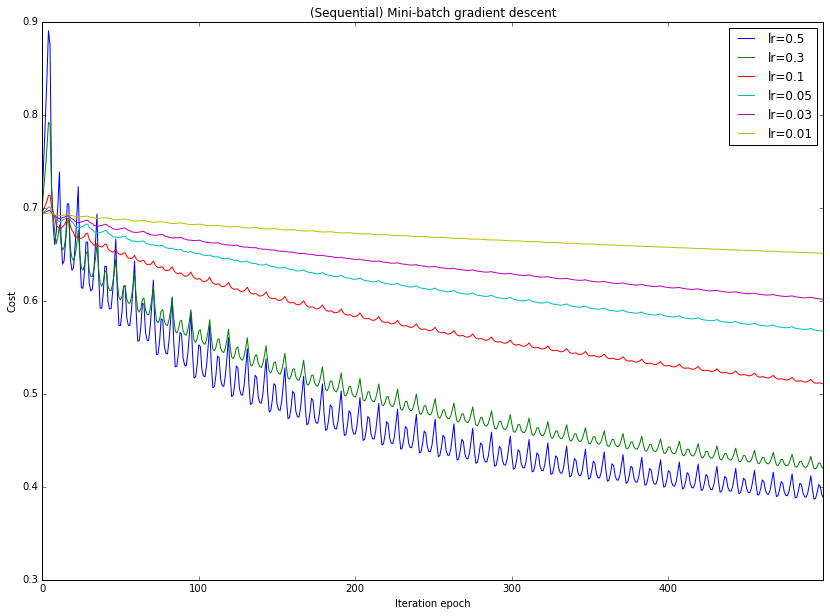

In [19]:
pylab.rcParams['figure.figsize']=14,10 # that's default image size for this interactive session

lr1.plot(label = "lr=0.5")
lr2.plot(label = "lr=0.3")
lr3.plot(label = "lr=0.1")
lr4.plot(label = "lr=0.05")
lr5.plot(label = "lr=0.03")
lr6.plot(label = "lr=0.01")

plt.legend()
plt.xlabel("Iteration epoch")
plt.ylabel("Cost")
plt.title("(Sequential) Mini-batch gradient descent")

failed to converage at! 1e-10
train accuracy= 0.847457627119


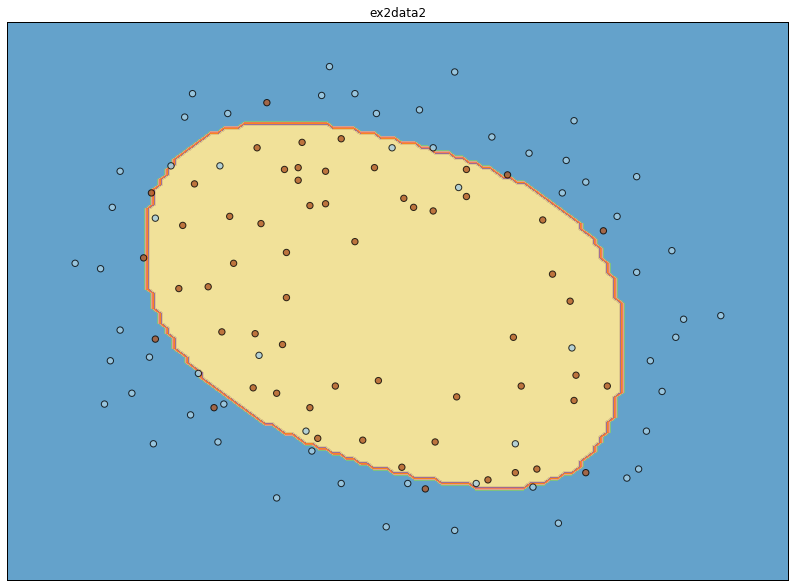

In [20]:
test = logisticRegression_sgd(viz = False,
                             learning_rate=0.2,
                             max_iters = 10000, 
                             tol=1e-10,
                             full_batch=False,
                             mini_batch_size=20,
                             rndbatch = False)
test.fit(X_new,y)
y_pred = test.predict(X_new)
print "train accuracy=", test.accuracy(y_pred,y)

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = test.predict(mapFeature(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,alpha=0.8,cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("ex2data2")

## Part 3

In [21]:
joblibpath = "/Users/jiajiechen/Desktop/CSE6240-HW2/hw2/joblib-master"

In [22]:
os.chdir(joblibpath)
from joblib import Parallel, delayed

In [23]:
class parallel_logisticRegression_sgd(logisticRegression):
    def __init__(self,nthreads=2,
                 theta=None,
                 mini_batch_size=20,
                 lambd=0.0):
        self.nthreads = nthreads
        self.theta = theta
        self.mini_batch_size=mini_batch_size
        self.lambd=lambd

In [24]:
data = pd.read_csv(datapath+"/ex2data2.txt", delimiter=",", header=None)
X = data.values[:,:2]
y = data.values[:,2]
del(data)

X_new = mapFeature(X)
print X_new.shape 

(118, 27)


In [25]:
clf = parallel_logisticRegression_sgd(mini_batch_size=20)

def update(X,y,
           theta,
           learning_rate,
           mini_batch_size,
           ii):
    sampleidx = np.random.choice(X.shape[0],mini_batch_size)
    batch = X[sampleidx,:]
    batch_y = y[sampleidx]

    gd = clf.gradient(theta, batch, batch_y)
    clf.theta = theta - learning_rate*gd
    J = clf.costFunction(theta, X, y)
    return J

def parallel_batch_sgd(X,y,theta,learning_rate,nthreads=1,max_iters=400,tol=1e-3,verbose=0):
    X_c=np.column_stack((np.ones(X_new.shape[0]),X))
    clf.theta=theta
    clf.learning_rate=learning_rate
    
    r = Parallel(n_jobs=nthreads, verbose=verbose, backend="threading"
                )(delayed(update
                         )(X_c,y,clf.theta,clf.learning_rate,clf.mini_batch_size,ii
                          ) for ii in xrange(max_iters))
    return pd.Series(r)

In [26]:
theta = np.zeros(X_new.shape[1]+1)

lr1 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.5,nthreads=2,max_iters=400,verbose=1)
lr2 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.3,nthreads=2,max_iters=400,verbose=1)
lr3 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.1,nthreads=2,max_iters=400,verbose=1)
lr4 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.05,nthreads=2,max_iters=400,verbose=1)
lr5 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.03,nthreads=2,max_iters=400,verbose=1)
lr6 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.01,nthreads=2,max_iters=400,verbose=1)

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Done  46 tasks    

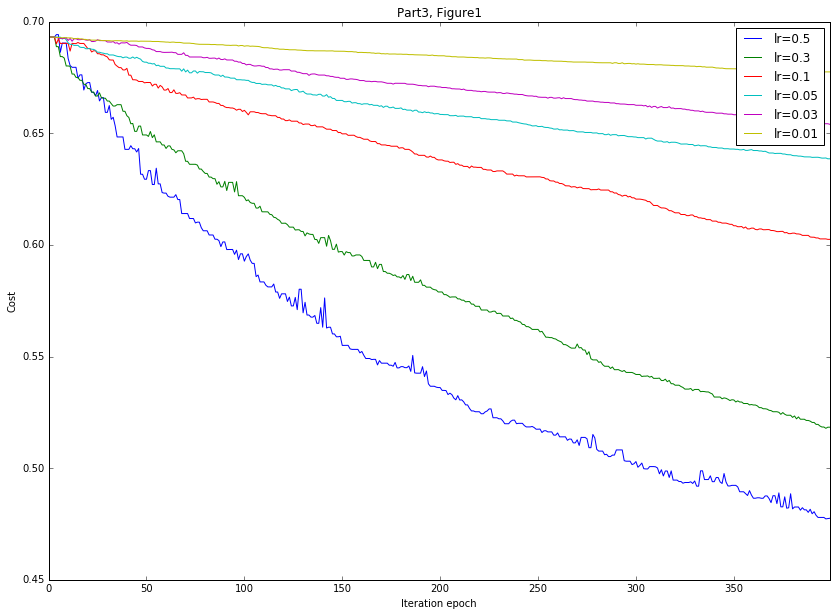

In [27]:
pylab.rcParams['figure.figsize']=14,10 # that's default image size for this interactive session

lr1.plot(label = "lr=0.5")
lr2.plot(label = "lr=0.3")
lr3.plot(label = "lr=0.1")
lr4.plot(label = "lr=0.05")
lr5.plot(label = "lr=0.03")
lr6.plot(label = "lr=0.01")

plt.legend()
plt.xlabel("Iteration epoch")
plt.ylabel("Cost")
plt.title("Part3, Figure1")

In [28]:
r1 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.5,nthreads=1,max_iters=4000,verbose=1)
r2 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.5,nthreads=2,max_iters=4000,verbose=1)
r3 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.5,nthreads=3,max_iters=4000,verbose=1)
r4 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.5,nthreads=4,max_iters=4000,verbose=1)

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    2.9s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 4000 out of 4000 | elapsed:    5.0s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:    2

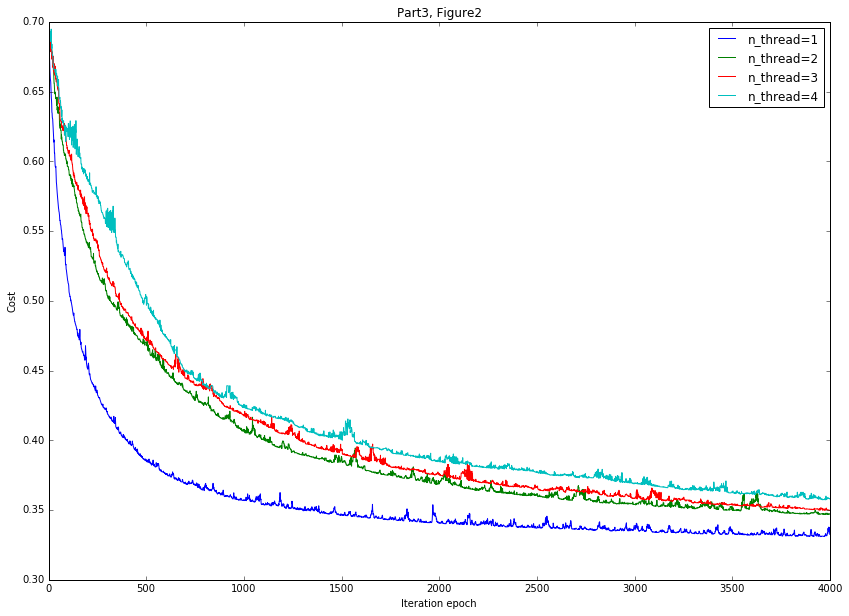

In [29]:
pylab.rcParams['figure.figsize']=14,10 # that's default image size for this interactive session

r1.plot(label = "n_thread=1")
r2.plot(label = "n_thread=2")
r3.plot(label = "n_thread=3")
r4.plot(label = "n_thread=4")

plt.legend()
plt.xlabel("Iteration epoch")
plt.ylabel("Cost")
plt.title("Part3, Figure2")

* From Part3, Figure1, and the following block we can see the speedup does not vary for different rates.
* From Part3, Figure2, in my experiment, the parallel SGD does not speedup the iteration, and even worse, it does not descent to the level as good as SGD using 1 thread, as you can see in the above figure.

In [32]:
r1 = parallel_batch_sgd(X_new,y,theta,learning_rate=0.5,nthreads=1,max_iters=4000,verbose=1)
y_pred = clf.predict(X_new)
clf.accuracy(y_pred,y)

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    2.7s finished


0.84745762711864403